### Plotting PTMs in Comet and PEAKS results using python for ETNP OM study

Starting with:

    Peaks de novo results (.csv) of PTM-optimized sequencing
    Comet results from PTM-optimized database searches

Goal:

    Figures comparing the modifcation type and extent in database and de novo peptides
    
Using:

    - pandas
    - matplotlib
    - numpy

In [82]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [154]:
# read in csvs made in SKQ17-PeaksDN nbs with NAAF corrected AAs (PTMs in there, too)

peaks231_NAAF50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_PTMopt_DN50_AA_NAAF.csv")
peaks231_NAAF80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_PTMopt_DN80_AA_NAAF.csv")

peaks233_NAAF50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-233-265m-0.3-JA4_PTMopt_DN50_AA_NAAF.csv")
peaks233_NAAF80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-233-265m-0.3-JA4_PTMopt_DN80_AA_NAAF.csv")

peaks243_NAAF50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-243-965m-0.3-JA14_PTMopt_DN50_AA_NAAF.csv")
peaks243_NAAF80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-243-965m-0.3-JA14_PTMopt_DN80_AA_NAAF.csv")

peaks378_NAAF50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_PTMopt_DN50_AA_NAAF.csv")
peaks378_NAAF80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_PTMopt_DN80_AA_NAAF.csv")

peaks278_NAAF50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-278-265m-trap_PTMopt_DN50_AA_NAAF.csv")
peaks278_NAAF80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-278-265m-trap_PTMopt_DN80_AA_NAAF.csv")

peaks273_NAAF50 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-273-965m-trap_PTMopt_DN50_AA_NAAF.csv")
peaks273_NAAF80 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-273-965m-trap_PTMopt_DN80_AA_NAAF.csv")

# there's a useless column in there to get rid of
peaks231_NAAF50 = peaks231_NAAF50.loc[:, ~peaks231_NAAF50.columns.str.contains('^Unnamed')]
peaks231_NAAF80 = peaks231_NAAF80.loc[:, ~peaks231_NAAF80.columns.str.contains('^Unnamed')]

peaks233_NAAF50 = peaks233_NAAF50.loc[:, ~peaks233_NAAF50.columns.str.contains('^Unnamed')]
peaks233_NAAF80 = peaks233_NAAF80.loc[:, ~peaks233_NAAF80.columns.str.contains('^Unnamed')]

peaks243_NAAF50 = peaks243_NAAF50.loc[:, ~peaks243_NAAF50.columns.str.contains('^Unnamed')]
peaks243_NAAF80 = peaks243_NAAF80.loc[:, ~peaks243_NAAF80.columns.str.contains('^Unnamed')]

peaks378_NAAF50 = peaks378_NAAF50.loc[:, ~peaks378_NAAF50.columns.str.contains('^Unnamed')]
peaks378_NAAF80 = peaks378_NAAF80.loc[:, ~peaks378_NAAF80.columns.str.contains('^Unnamed')]

peaks278_NAAF50 = peaks278_NAAF50.loc[:, ~peaks278_NAAF50.columns.str.contains('^Unnamed')]
peaks278_NAAF80 = peaks278_NAAF80.loc[:, ~peaks278_NAAF80.columns.str.contains('^Unnamed')]

peaks273_NAAF50 = peaks273_NAAF50.loc[:, ~peaks273_NAAF50.columns.str.contains('^Unnamed')]
peaks273_NAAF80 = peaks273_NAAF80.loc[:, ~peaks273_NAAF80.columns.str.contains('^Unnamed')]

peaks231_NAAF50.head()

,stripped peptide,NAAF factor,A,C,D,E,F,G,H,K,...,V-NAAF50,W-NAAF50,Y-NAAF50,ccarb-NAAF50,moxid-NAAF50,ndeam-NAAF50,qdeam-NAAF50,khydr-NAAF50,phydr-NAAF50,rmeth-NAAF50
0,ENLAALEK,15.944261,2,0,0,2,0,0,0,1,...,0.000000,0.000000,0.0,0.0,0.0,15.944261,0.0,0.0,0.0,0.0
1,ENLLAK,4.367761,1,0,0,1,0,0,0,1,...,0.000000,0.000000,0.0,0.0,0.0,8.735523,0.0,0.0,0.0,0.0
2,TGNFLDPK,2.426841,0,0,1,0,1,1,0,1,...,0.000000,0.000000,0.0,0.0,0.0,2.426841,0.0,0.0,0.0,0.0
3,WLVNHPR,0.733614,0,0,0,0,0,0,1,0,...,0.733614,0.733614,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,TDENLPLGPK,3.611272,0,0,1,1,0,1,0,1,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [169]:
# made a new dataframe that contains the sums of NAAF normalized AAs for peaks231_ >50%
# also contains the sums of the NAAF-corrected PTMs occurances for each affected residue

index = ['sample total']

data = {'A-NAAF': peaks231_NAAF50['A-NAAF50'].sum(),
        'C-NAAF': peaks231_NAAF50['C-NAAF50'].sum(),
        'D-NAAF': peaks231_NAAF50['D-NAAF50'].sum(),
        'E-NAAF': peaks231_NAAF50['E-NAAF50'].sum(),
        'F-NAAF': peaks231_NAAF50['F-NAAF50'].sum(),
        'G-NAAF': peaks231_NAAF50['G-NAAF50'].sum(),
        'H-NAAF': peaks231_NAAF50['H-NAAF50'].sum(),
        'K-NAAF': peaks231_NAAF50['K-NAAF50'].sum(),
        'I/L-NAAF': peaks231_NAAF50['I/L-NAAF50'].sum(),
        'M-NAAF': peaks231_NAAF50['M-NAAF50'].sum(),
        'N-NAAF': peaks231_NAAF50['N-NAAF50'].sum(),
        'P-NAAF': peaks231_NAAF50['P-NAAF50'].sum(),
        'Q-NAAF': peaks231_NAAF50['Q-NAAF50'].sum(),
        'R-NAAF': peaks231_NAAF50['R-NAAF50'].sum(),
        'S-NAAF': peaks231_NAAF50['S-NAAF50'].sum(),
        'T-NAAF': peaks231_NAAF50['T-NAAF50'].sum(),
        'V-NAAF': peaks231_NAAF50['V-NAAF50'].sum(),
        'W-NAAF': peaks231_NAAF50['W-NAAF50'].sum(),
        'Y-NAAF': peaks231_NAAF50['Y-NAAF50'].sum(),
        'C-carb-NAAF': peaks231_NAAF50['ccarb-NAAF50'].sum(),
        'M-oxid-NAAF': peaks231_NAAF50['moxid-NAAF50'].sum(),
        'N-deam-NAAF': peaks231_NAAF50['ndeam-NAAF50'].sum(),
        'Q-deam-NAAF': peaks231_NAAF50['qdeam-NAAF50'].sum(),
        'K-hydr-NAAF': peaks231_NAAF50['khydr-NAAF50'].sum(),
        'P-hydr-NAAF': peaks231_NAAF50['phydr-NAAF50'].sum(),
        'R-meth-NAAF': peaks231_NAAF50['rmeth-NAAF50'].sum()
       }

totalpeaks231_NAAF50 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', \
                                                   'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', \
                                                   'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', \
                                                   'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF', 'C-carb-NAAF', \
                                                   'M-oxid-NAAF', 'N-deam-NAAF', 'Q-deam-NAAF', 'K-hydr-NAAF',\
                                                   'P-hydr-NAAF', 'R-meth-NAAF'], index=index)

# calculate the NAAF-corrected % modified C, M, N, Q, K, P, and Rs


totalpeaks231_NAAF50['% C w/ carb. NAAF'] = totalpeaks231_NAAF50['C-carb-NAAF'] / totalpeaks231_NAAF50['C-NAAF']
totalpeaks231_NAAF50['% M w/ oxid. NAAF'] = totalpeaks231_NAAF50['M-oxid-NAAF'] / totalpeaks231_NAAF50['M-NAAF']
totalpeaks231_NAAF50['% N w/ deam. NAAF'] = totalpeaks231_NAAF50['N-deam-NAAF'] / totalpeaks231_NAAF50['N-NAAF']
totalpeaks231_NAAF50['% Q w/ deam. NAAF'] = totalpeaks231_NAAF50['Q-deam-NAAF'] / totalpeaks231_NAAF50['Q-NAAF']
totalpeaks231_NAAF50['% K w/ hydr. NAAF'] = totalpeaks231_NAAF50['K-hydr-NAAF'] / totalpeaks231_NAAF50['K-NAAF']
totalpeaks231_NAAF50['% P w/ hydr. NAAF'] = totalpeaks231_NAAF50['P-hydr-NAAF'] / totalpeaks231_NAAF50['P-NAAF']
totalpeaks231_NAAF50['% R w/ meth. NAAF'] = totalpeaks231_NAAF50['R-meth-NAAF'] / totalpeaks231_NAAF50['R-NAAF']

totalpeaks231_NAAF50.head()

,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,K-NAAF,I/L-NAAF,M-NAAF,...,K-hydr-NAAF,P-hydr-NAAF,R-meth-NAAF,% C w/ carb. NAAF,% M w/ oxid. NAAF,% N w/ deam. NAAF,% Q w/ deam. NAAF,% K w/ hydr. NAAF,% P w/ hydr. NAAF,% R w/ meth. NAAF
sample total,5345.440129,473.34702,1669.296545,2564.015382,1083.482356,1842.142438,364.192253,3014.010158,6152.71362,791.829055,...,435.884575,877.284293,1589.339943,1.0,0.529633,0.441172,0.150038,0.144619,0.18273,0.307897


In [5]:
# made a new dataframe that contains the sums of NAAF normalized AAs for peaks233_ >50%

index = ['sample total']

data = {'A-NAAF': peaks233_NAAF50['A-NAAF50'].sum(),
        'C-NAAF': peaks233_NAAF50['C-NAAF50'].sum(),
        'D-NAAF': peaks233_NAAF50['D-NAAF50'].sum(),
        'E-NAAF': peaks233_NAAF50['E-NAAF50'].sum(),
        'F-NAAF': peaks233_NAAF50['F-NAAF50'].sum(),
        'G-NAAF': peaks233_NAAF50['G-NAAF50'].sum(),
        'H-NAAF': peaks233_NAAF50['H-NAAF50'].sum(),
        'K-NAAF': peaks233_NAAF50['K-NAAF50'].sum(),
        'I/L-NAAF': peaks233_NAAF50['I/L-NAAF50'].sum(),
        'M-NAAF': peaks233_NAAF50['M-NAAF50'].sum(),
        'N-NAAF': peaks233_NAAF50['N-NAAF50'].sum(),
        'P-NAAF': peaks233_NAAF50['P-NAAF50'].sum(),
        'Q-NAAF': peaks233_NAAF50['Q-NAAF50'].sum(),
        'R-NAAF': peaks233_NAAF50['R-NAAF50'].sum(),
        'S-NAAF': peaks233_NAAF50['S-NAAF50'].sum(),
        'T-NAAF': peaks233_NAAF50['T-NAAF50'].sum(),
        'V-NAAF': peaks233_NAAF50['V-NAAF50'].sum(),
        'W-NAAF': peaks233_NAAF50['W-NAAF50'].sum(),
        'Y-NAAF': peaks233_NAAF50['Y-NAAF50'].sum()
       }

totalpeaks233_NAAF50 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF'], index=index)
totalpeaks233_NAAF50.head()

,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,K-NAAF,I/L-NAAF,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
sample total,3530.528532,739.737415,780.08151,1580.461391,505.83234,1390.130777,534.510528,2437.063785,4968.403853,680.832521,1581.645023,3775.339252,635.036913,4380.269891,3136.964216,3459.93174,7161.494538,800.34394,581.032765


In [6]:
# made a new dataframe that contains the sums of NAAF normalized AAs for peaks243_ >50%

index = ['sample total']

data = {'A-NAAF': peaks243_NAAF50['A-NAAF50'].sum(),
        'C-NAAF': peaks243_NAAF50['C-NAAF50'].sum(),
        'D-NAAF': peaks243_NAAF50['D-NAAF50'].sum(),
        'E-NAAF': peaks243_NAAF50['E-NAAF50'].sum(),
        'F-NAAF': peaks243_NAAF50['F-NAAF50'].sum(),
        'G-NAAF': peaks243_NAAF50['G-NAAF50'].sum(),
        'H-NAAF': peaks243_NAAF50['H-NAAF50'].sum(),
        'K-NAAF': peaks243_NAAF50['K-NAAF50'].sum(),
        'I/L-NAAF': peaks243_NAAF50['I/L-NAAF50'].sum(),
        'M-NAAF': peaks243_NAAF50['M-NAAF50'].sum(),
        'N-NAAF': peaks243_NAAF50['N-NAAF50'].sum(),
        'P-NAAF': peaks243_NAAF50['P-NAAF50'].sum(),
        'Q-NAAF': peaks243_NAAF50['Q-NAAF50'].sum(),
        'R-NAAF': peaks243_NAAF50['R-NAAF50'].sum(),
        'S-NAAF': peaks243_NAAF50['S-NAAF50'].sum(),
        'T-NAAF': peaks243_NAAF50['T-NAAF50'].sum(),
        'V-NAAF': peaks243_NAAF50['V-NAAF50'].sum(),
        'W-NAAF': peaks243_NAAF50['W-NAAF50'].sum(),
        'Y-NAAF': peaks243_NAAF50['Y-NAAF50'].sum()
       }

totalpeaks243_NAAF50 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF'], index=index)
totalpeaks243_NAAF50.head()

,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,K-NAAF,I/L-NAAF,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
sample total,1651.192949,89.313879,259.673047,554.889208,100.72868,322.680347,35.592855,485.100316,1587.339583,206.408809,497.725697,1427.792387,141.11566,1858.482876,1308.701666,1260.241335,3306.18954,146.752866,76.041343


In [7]:
# made a new dataframe that contains the sums of NAAF normalized AAs for peaks378_ >50%

index = ['sample total']

data = {'A-NAAF': peaks378_NAAF50['A-NAAF50'].sum(),
        'C-NAAF': peaks378_NAAF50['C-NAAF50'].sum(),
        'D-NAAF': peaks378_NAAF50['D-NAAF50'].sum(),
        'E-NAAF': peaks378_NAAF50['E-NAAF50'].sum(),
        'F-NAAF': peaks378_NAAF50['F-NAAF50'].sum(),
        'G-NAAF': peaks378_NAAF50['G-NAAF50'].sum(),
        'H-NAAF': peaks378_NAAF50['H-NAAF50'].sum(),
        'K-NAAF': peaks378_NAAF50['K-NAAF50'].sum(),
        'I/L-NAAF': peaks378_NAAF50['I/L-NAAF50'].sum(),
        'M-NAAF': peaks378_NAAF50['M-NAAF50'].sum(),
        'N-NAAF': peaks378_NAAF50['N-NAAF50'].sum(),
        'P-NAAF': peaks378_NAAF50['P-NAAF50'].sum(),
        'Q-NAAF': peaks378_NAAF50['Q-NAAF50'].sum(),
        'R-NAAF': peaks378_NAAF50['R-NAAF50'].sum(),
        'S-NAAF': peaks378_NAAF50['S-NAAF50'].sum(),
        'T-NAAF': peaks378_NAAF50['T-NAAF50'].sum(),
        'V-NAAF': peaks378_NAAF50['V-NAAF50'].sum(),
        'W-NAAF': peaks378_NAAF50['W-NAAF50'].sum(),
        'Y-NAAF': peaks378_NAAF50['Y-NAAF50'].sum()
       }

totalpeaks378_NAAF50 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF'], index=index)
totalpeaks378_NAAF50.head()

,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,K-NAAF,I/L-NAAF,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
sample total,1270.467168,136.422285,313.47123,775.113786,195.85109,352.889747,51.926324,674.684945,1151.900817,151.159716,403.350581,1329.426332,178.151553,1199.322134,894.391665,981.657479,2355.842487,95.49908,265.356728


In [8]:
# made a new dataframe that contains the sums of NAAF normalized AAs for peaks278_ >50%

index = ['sample total']

data = {'A-NAAF': peaks278_NAAF50['A-NAAF50'].sum(),
        'C-NAAF': peaks278_NAAF50['C-NAAF50'].sum(),
        'D-NAAF': peaks278_NAAF50['D-NAAF50'].sum(),
        'E-NAAF': peaks278_NAAF50['E-NAAF50'].sum(),
        'F-NAAF': peaks278_NAAF50['F-NAAF50'].sum(),
        'G-NAAF': peaks278_NAAF50['G-NAAF50'].sum(),
        'H-NAAF': peaks278_NAAF50['H-NAAF50'].sum(),
        'K-NAAF': peaks278_NAAF50['K-NAAF50'].sum(),
        'I/L-NAAF': peaks278_NAAF50['I/L-NAAF50'].sum(),
        'M-NAAF': peaks278_NAAF50['M-NAAF50'].sum(),
        'N-NAAF': peaks278_NAAF50['N-NAAF50'].sum(),
        'P-NAAF': peaks278_NAAF50['P-NAAF50'].sum(),
        'Q-NAAF': peaks278_NAAF50['Q-NAAF50'].sum(),
        'R-NAAF': peaks278_NAAF50['R-NAAF50'].sum(),
        'S-NAAF': peaks278_NAAF50['S-NAAF50'].sum(),
        'T-NAAF': peaks278_NAAF50['T-NAAF50'].sum(),
        'V-NAAF': peaks278_NAAF50['V-NAAF50'].sum(),
        'W-NAAF': peaks278_NAAF50['W-NAAF50'].sum(),
        'Y-NAAF': peaks278_NAAF50['Y-NAAF50'].sum()
       }

totalpeaks278_NAAF50 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF'], index=index)
totalpeaks278_NAAF50.head()

,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,K-NAAF,I/L-NAAF,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
sample total,8238.834018,1987.563794,5706.833608,6905.567381,2802.732759,5459.726941,2710.610833,12407.944608,11459.458307,6512.666804,7586.274688,11858.82888,2490.664531,8402.72334,5219.341069,5777.655775,8529.446756,2176.19395,2220.043396


In [9]:
# made a new dataframe that contains the sums of NAAF normalized AAs for peaks273_ >50%

index = ['sample total']

data = {'A-NAAF': peaks273_NAAF50['A-NAAF50'].sum(),
        'C-NAAF': peaks273_NAAF50['C-NAAF50'].sum(),
        'D-NAAF': peaks273_NAAF50['D-NAAF50'].sum(),
        'E-NAAF': peaks273_NAAF50['E-NAAF50'].sum(),
        'F-NAAF': peaks273_NAAF50['F-NAAF50'].sum(),
        'G-NAAF': peaks273_NAAF50['G-NAAF50'].sum(),
        'H-NAAF': peaks273_NAAF50['H-NAAF50'].sum(),
        'K-NAAF': peaks273_NAAF50['K-NAAF50'].sum(),
        'I/L-NAAF': peaks273_NAAF50['I/L-NAAF50'].sum(),
        'M-NAAF': peaks273_NAAF50['M-NAAF50'].sum(),
        'N-NAAF': peaks273_NAAF50['N-NAAF50'].sum(),
        'P-NAAF': peaks273_NAAF50['P-NAAF50'].sum(),
        'Q-NAAF': peaks273_NAAF50['Q-NAAF50'].sum(),
        'R-NAAF': peaks273_NAAF50['R-NAAF50'].sum(),
        'S-NAAF': peaks273_NAAF50['S-NAAF50'].sum(),
        'T-NAAF': peaks273_NAAF50['T-NAAF50'].sum(),
        'V-NAAF': peaks273_NAAF50['V-NAAF50'].sum(),
        'W-NAAF': peaks273_NAAF50['W-NAAF50'].sum(),
        'Y-NAAF': peaks273_NAAF50['Y-NAAF50'].sum()
       }

totalpeaks273_NAAF50 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF'], index=index)
totalpeaks273_NAAF50.head()

,A-NAAF,C-NAAF,D-NAAF,E-NAAF,F-NAAF,G-NAAF,H-NAAF,K-NAAF,I/L-NAAF,M-NAAF,N-NAAF,P-NAAF,Q-NAAF,R-NAAF,S-NAAF,T-NAAF,V-NAAF,W-NAAF,Y-NAAF
sample total,6450.77529,1752.396362,3708.88847,4501.376268,2324.136272,3534.665398,2176.237755,9627.219402,9280.47319,5570.297567,5383.332556,9681.157615,2328.604993,8935.671909,4075.741649,4571.8862,8235.813647,1464.657279,1748.21109


In [160]:
frames = [totalpeaks231_NAAF50, totalpeaks233_NAAF50, totalpeaks243_NAAF50, totalpeaks378_NAAF50, \
         totalpeaks278_NAAF50, totalpeaks273_NAAF50]
index = ['totalpeaks231_NAAF50', 'totalpeaks233_NAAF50', 'totalpeaks243_NAAF50', 'totalpeaks378_NAAF50', \
         'totalpeaks278_NAAF50', 'totalpeaks273_NAAF50']

# concatenate dataframes
NAAFtot = pd.concat(frames, sort=False, ignore_index=True)

# reindex 
names = ['peaks231', 'peaks233', 'peaks243', 'peaks378', 'peaks278', 'peaks273']
NAAFtot.insert(loc=0, column='data source', value=names)
NAAFtot.set_index('data source')

# sum all the AAs in each dataset, making a new column
NAAFtot['AA-Total-NAAF'] = NAAFtot['A-NAAF'] + NAAFtot['C-NAAF'] + NAAFtot['D-NAAF'] + NAAFtot['E-NAAF'] \
+ NAAFtot['F-NAAF'] + NAAFtot['G-NAAF'] + NAAFtot['H-NAAF'] + NAAFtot['K-NAAF'] + NAAFtot['I/L-NAAF'] \
+ NAAFtot['M-NAAF'] + NAAFtot['N-NAAF'] + NAAFtot['P-NAAF'] + NAAFtot['Q-NAAF'] + NAAFtot['R-NAAF'] \
+ NAAFtot['S-NAAF'] + NAAFtot['T-NAAF'] + NAAFtot['V-NAAF'] + NAAFtot['W-NAAF'] + NAAFtot['Y-NAAF'] \

# calculate the relative (NAAF-normalized) AA composition (fractions of AA total for each dataset)

NAAFtot['A_RelNAAF'] = NAAFtot['A-NAAF']/NAAFtot['AA-Total-NAAF']  #A
NAAFtot['C_RelNAAF'] = NAAFtot['C-NAAF']/NAAFtot['AA-Total-NAAF']  #C
NAAFtot['D_RelNAAF'] = NAAFtot['D-NAAF']/NAAFtot['AA-Total-NAAF']  #D
NAAFtot['E_RelNAAF'] = NAAFtot['E-NAAF']/NAAFtot['AA-Total-NAAF']  #E
NAAFtot['F_RelNAAF'] = NAAFtot['F-NAAF']/NAAFtot['AA-Total-NAAF']  #F
NAAFtot['G_RelNAAF'] = NAAFtot['G-NAAF']/NAAFtot['AA-Total-NAAF']  #G
NAAFtot['H_RelNAAF'] = NAAFtot['H-NAAF']/NAAFtot['AA-Total-NAAF']  #H
NAAFtot['K_RelNAAF'] = NAAFtot['K-NAAF']/NAAFtot['AA-Total-NAAF']  #K
NAAFtot['I/L_RelNAAF'] = NAAFtot['I/L-NAAF']/NAAFtot['AA-Total-NAAF']  #I/L
NAAFtot['M_RelNAAF'] = NAAFtot['M-NAAF']/NAAFtot['AA-Total-NAAF']  #M
NAAFtot['N_RelNAAF'] = NAAFtot['N-NAAF']/NAAFtot['AA-Total-NAAF']  #N
NAAFtot['P_RelNAAF'] = NAAFtot['P-NAAF']/NAAFtot['AA-Total-NAAF']  #P
NAAFtot['Q_RelNAAF'] = NAAFtot['Q-NAAF']/NAAFtot['AA-Total-NAAF']  #Q
NAAFtot['R_RelNAAF'] = NAAFtot['R-NAAF']/NAAFtot['AA-Total-NAAF']  #R
NAAFtot['S_RelNAAF'] = NAAFtot['S-NAAF']/NAAFtot['AA-Total-NAAF']  #S
NAAFtot['T_RelNAAF'] = NAAFtot['T-NAAF']/NAAFtot['AA-Total-NAAF']  #T
NAAFtot['V_RelNAAF'] = NAAFtot['V-NAAF']/NAAFtot['AA-Total-NAAF']  #V
NAAFtot['W_RelNAAF'] = NAAFtot['W-NAAF']/NAAFtot['AA-Total-NAAF']  #W
NAAFtot['Y_RelNAAF'] = NAAFtot['Y-NAAF']/NAAFtot['AA-Total-NAAF']  #Y

# make a smaller dataframe with just the relative, NAAF-normalized AA compositions
AA_RelNAAF = NAAFtot[['A_RelNAAF', 'C_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', 'G_RelNAAF', 'H_RelNAAF', \
                      'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', 'N_RelNAAF', 'P_RelNAAF', 'Q_RelNAAF', 'R_RelNAAF', \
                      'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'W_RelNAAF', 'Y_RelNAAF']].copy()

# reindex with peaks231_ and comet
names = ['1. 100 m sus.', '2. 265 m sus.', '3. 965 m sus.', '4. 100 m trap', '6. 265 m trap', '6. 965 m trap']
AA_RelNAAF.insert(loc=0, column='data source', value=names)
AA_RelNAAF.set_index('data source')

AA_RelNAAF.head()

,data source,A_RelNAAF,C_RelNAAF,D_RelNAAF,E_RelNAAF,F_RelNAAF,G_RelNAAF,H_RelNAAF,K_RelNAAF,I/L_RelNAAF,M_RelNAAF,N_RelNAAF,P_RelNAAF,Q_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,W_RelNAAF,Y_RelNAAF
0,1. 100 m sus.,0.099427,0.008804,0.031049,0.047691,0.020153,0.034264,0.006774,0.056061,0.114442,0.014728,0.047836,0.089300,0.022520,0.096013,0.064214,0.064663,0.151073,0.015679,0.015307
1,2. 265 m sus.,0.082760,0.017340,0.018286,0.037048,0.011857,0.032587,0.012530,0.057128,0.116466,0.015960,0.037076,0.088499,0.014886,0.102679,0.073535,0.081106,0.167875,0.018761,0.013620
2,3. 965 m sus.,0.107809,0.005831,0.016954,0.036229,0.006577,0.021068,0.002324,0.031673,0.103640,0.013477,0.032497,0.093223,0.009214,0.121343,0.085447,0.082283,0.215866,0.009582,0.004965
3,4. 100 m trap,0.099435,0.010677,0.024534,0.060665,0.015329,0.027619,0.004064,0.052805,0.090155,0.011831,0.031569,0.104049,0.013943,0.093867,0.070001,0.076831,0.184383,0.007474,0.020768
4,6. 265 m trap,0.069554,0.016779,0.048178,0.058298,0.023661,0.046092,0.022883,0.104750,0.096743,0.054981,0.064045,0.100114,0.021027,0.070937,0.044063,0.048776,0.072007,0.018372,0.018742


### Same process for Peaks > ALC 80%

In [ ]:
# made a new dataframe that contains the sums of NAAF normalized AAs for Peaks >80%

index = ['sample total']

data = {'A-NAAF': peaks231_NAAF80['A-NAAF80'].sum(),
        'C-NAAF': peaks231_NAAF80['C-NAAF80'].sum(),
        'D-NAAF': peaks231_NAAF80['D-NAAF80'].sum(),
        'E-NAAF': peaks231_NAAF80['E-NAAF80'].sum(),
        'F-NAAF': peaks231_NAAF80['F-NAAF80'].sum(),
        'G-NAAF': peaks231_NAAF80['G-NAAF80'].sum(),
        'H-NAAF': peaks231_NAAF80['H-NAAF80'].sum(),
        'K-NAAF': peaks231_NAAF80['K-NAAF80'].sum(),
        'I/L-NAAF': peaks231_NAAF80['I/L-NAAF80'].sum(),
        'M-NAAF': peaks231_NAAF80['M-NAAF80'].sum(),
        'N-NAAF': peaks231_NAAF80['N-NAAF80'].sum(),
        'P-NAAF': peaks231_NAAF80['P-NAAF80'].sum(),
        'Q-NAAF': peaks231_NAAF80['Q-NAAF80'].sum(),
        'R-NAAF': peaks231_NAAF80['R-NAAF80'].sum(),
        'S-NAAF': peaks231_NAAF80['S-NAAF80'].sum(),
        'T-NAAF': peaks231_NAAF80['T-NAAF80'].sum(),
        'V-NAAF': peaks231_NAAF80['V-NAAF80'].sum(),
        'W-NAAF': peaks231_NAAF80['W-NAAF80'].sum(),
        'Y-NAAF': peaks231_NAAF80['Y-NAAF80'].sum()
       }

totalpeaks231_NAAF80 = pd.DataFrame(data, columns=['A-NAAF', 'C-NAAF', 'D-NAAF', 'E-NAAF', 'F-NAAF', 'G-NAAF', 'H-NAAF', 'K-NAAF', 'I/L-NAAF', 'M-NAAF', 'N-NAAF', 'P-NAAF', 'Q-NAAF', 'R-NAAF', 'S-NAAF', 'T-NAAF', 'V-NAAF', 'W-NAAF', 'Y-NAAF'], index=index)
totalpeaks231_NAAF80.head()

### Visualizing the results:

Text(0.5, 1.0, 'd) Basic and acidic R-groups')

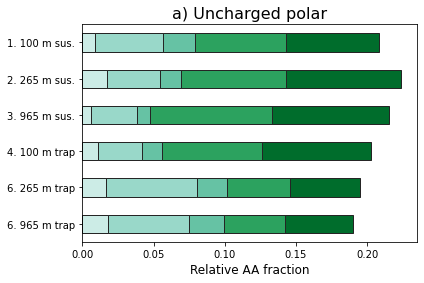

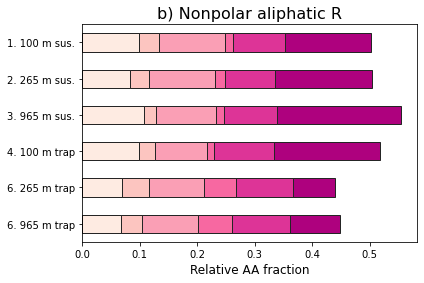

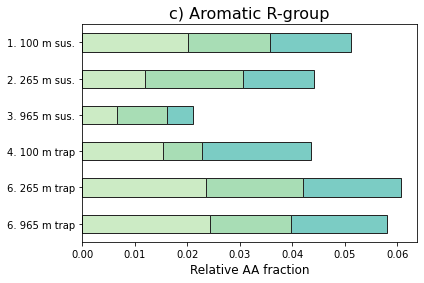

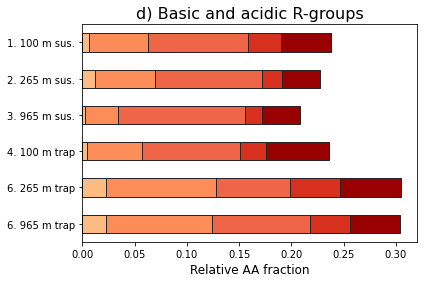

In [101]:
# plotting the NAAF-corrected AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

#plt.subplots(nrows=2, ncols=2)
#plt.subplots(figsize=(20,10)) 
#plt.tight_layout()

AA_RelNAAF_sorted_desc= AA_RelNAAF.sort_values('data source',ascending=False)


my_colors1 = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
my_colors2 = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
my_colors3 = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
my_colors4 = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# another color option: 
#purples = '#bfd3e6', '#9ebcda', '#8c96c6', '#8c6bb1', '#88419d', '#6e016b'


# uncharged polar
ax1 = AA_RelNAAF_sorted_desc.plot.barh(y=['C_RelNAAF', \
                             'N_RelNAAF', 'Q_RelNAAF', 'S_RelNAAF', \
                             'T_RelNAAF' \
                            ], x='data source', stacked=True, color = my_colors1, edgecolor = '#252525')
ax1.legend_.remove()
ax1.set_xlabel('Relative AA fraction', fontsize = 12)
ax1.set_ylabel('')
ax1.set_title('a) Uncharged polar', fontsize = 16)


# nonpolar, aliphatic R-group
ax2 = AA_RelNAAF_sorted_desc.plot.barh(y=['A_RelNAAF', \
                             'G_RelNAAF','I/L_RelNAAF', 'M_RelNAAF', \
                             'P_RelNAAF', \
                             'V_RelNAAF',\
                            ], x='data source', stacked=True, color = my_colors2, edgecolor = '#252525')
ax2.legend_.remove()
ax2.set_xlabel('Relative AA fraction', fontsize = 12)
ax2.set_ylabel('')
ax2.set_title('b) Nonpolar aliphatic R', fontsize = 16)

# aromatic R-group
ax3 = AA_RelNAAF_sorted_desc.plot.barh(y=['F_RelNAAF', \
                              'W_RelNAAF', 'Y_RelNAAF' \
                            ], x='data source', stacked=True, color = my_colors3, edgecolor = '#252525')
ax3.legend_.remove()
ax3.set_xlabel('Relative AA fraction', fontsize = 12)
ax3.set_ylabel('')
ax3.set_title('c) Aromatic R-group', fontsize = 16)


# Basic and acidic R-group
ax4 = AA_RelNAAF_sorted_desc.plot.barh(y=['H_RelNAAF', 'K_RelNAAF', 'R_RelNAAF', 
                            'D_RelNAAF', 'E_RelNAAF', 
                            ], x='data source', stacked=True, color = my_colors4, edgecolor = '#252525')
ax4.legend_.remove()
ax4.set_xlabel('Relative AA fraction', fontsize = 12)
ax4.set_ylabel('')
ax4.set_title('d) Basic and acidic R-groups', fontsize = 16)


In [112]:
# plot NAAF-corrected AA compositions in a heatmap

AA_RelNAAF.style.background_gradient(cmap ='viridis')

,data source,A_RelNAAF,C_RelNAAF,D_RelNAAF,E_RelNAAF,F_RelNAAF,G_RelNAAF,H_RelNAAF,K_RelNAAF,I/L_RelNAAF,M_RelNAAF,N_RelNAAF,P_RelNAAF,Q_RelNAAF,R_RelNAAF,S_RelNAAF,T_RelNAAF,V_RelNAAF,W_RelNAAF,Y_RelNAAF
0,1. 100 m sus.,0.099427,0.008804,0.031049,0.047691,0.020153,0.034264,0.006774,0.056061,0.114442,0.014728,0.047836,0.089300,0.022520,0.096013,0.064214,0.064663,0.151073,0.015679,0.015307
1,2. 265 m sus.,0.082760,0.017340,0.018286,0.037048,0.011857,0.032587,0.012530,0.057128,0.116466,0.015960,0.037076,0.088499,0.014886,0.102679,0.073535,0.081106,0.167875,0.018761,0.013620
2,3. 965 m sus.,0.107809,0.005831,0.016954,0.036229,0.006577,0.021068,0.002324,0.031673,0.103640,0.013477,0.032497,0.093223,0.009214,0.121343,0.085447,0.082283,0.215866,0.009582,0.004965
3,4. 100 m trap,0.099435,0.010677,0.024534,0.060665,0.015329,0.027619,0.004064,0.052805,0.090155,0.011831,0.031569,0.104049,0.013943,0.093867,0.070001,0.076831,0.184383,0.007474,0.020768
4,6. 265 m trap,0.069554,0.016779,0.048178,0.058298,0.023661,0.046092,0.022883,0.104750,0.096743,0.054981,0.064045,0.100114,0.021027,0.070937,0.044063,0.048776,0.072007,0.018372,0.018742
5,6. 965 m trap,0.067653,0.018378,0.038897,0.047208,0.024374,0.037070,0.022823,0.100966,0.097329,0.058419,0.056458,0.101531,0.024421,0.093713,0.042744,0.047948,0.086373,0.015361,0.018334


### Same process for NAAF-corrected PTM occurance

In [117]:
# read in csvs made in SKQ17-PeaksDN nbs with NAAF corrected AAs

peaks231_PTM_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_PTMopt_DN50_PTM_NAAF.csv")
peaks233_PTM_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-233-265m-0.3-JA4_PTMopt_DN50_PTM_NAAF.csv")
peaks243_PTM_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-243-965m-0.3-JA14_PTMopt_DN50_PTM_NAAF.csv")
peaks378_PTM_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_PTMopt_DN50_PTM_NAAF.csv")
peaks278_PTM_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-278-265m-trap_PTMopt_DN50_PTM_NAAF.csv")
peaks273_PTM_NAAF = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-273-965m-trap_PTMopt_DN50_PTM_NAAF.csv")

# there's a useless column in there to get rid of
peaks231_PTM_NAAF = peaks231_PTM_NAAF.loc[:, ~peaks231_PTM_NAAF.columns.str.contains('^Unnamed')]
peaks233_PTM_NAAF = peaks233_PTM_NAAF.loc[:, ~peaks233_PTM_NAAF.columns.str.contains('^Unnamed')]
peaks243_PTM_NAAF = peaks243_PTM_NAAF.loc[:, ~peaks243_PTM_NAAF.columns.str.contains('^Unnamed')]
peaks378_PTM_NAAF = peaks378_PTM_NAAF.loc[:, ~peaks378_PTM_NAAF.columns.str.contains('^Unnamed')]
peaks278_PTM_NAAF = peaks278_PTM_NAAF.loc[:, ~peaks278_PTM_NAAF.columns.str.contains('^Unnamed')]
peaks273_PTM_NAAF = peaks273_PTM_NAAF.loc[:, ~peaks273_PTM_NAAF.columns.str.contains('^Unnamed')]

peaks231_PTM_NAAF.head()

,stripped peptide,NAAF factor,c-carb,m-oxid,n-deam,q-deam,k-hydr,p-hydr,r-meth,ccarb-NAAF50,moxid-NAAF50,ndeam-NAAF50,qdeam-NAAF50,khydr-NAAF50,phydr-NAAF50,rmeth-NAAF50
0,ENLAALEK,15.944261,0,0,1,0,0,0,0,0.0,0.0,15.944261,0.0,0.0,0.0,0.0
1,ENLLAK,4.367761,0,0,2,0,0,0,0,0.0,0.0,8.735523,0.0,0.0,0.0,0.0
2,TGNFLDPK,2.426841,0,0,1,0,0,0,0,0.0,0.0,2.426841,0.0,0.0,0.0,0.0
3,WLVNHPR,0.733614,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,TDENLPLGPK,3.611272,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [119]:
# made a new dataframe that contains the sums of NAAF normalized PTMs for peaks231_ >50%

index = ['sample total']

data = {'ccarb-NAAF': peaks231_PTM_NAAF['ccarb-NAAF50'].sum(),
        'moxid-NAAF': peaks231_PTM_NAAF['moxid-NAAF50'].sum(),
        'ndeam-NAAF': peaks231_PTM_NAAF['ndeam-NAAF50'].sum(),
        'qdeam-NAAF': peaks231_PTM_NAAF['qdeam-NAAF50'].sum(),
        'khydr-NAAF': peaks231_PTM_NAAF['khydr-NAAF50'].sum(),
        'phydr-NAAF': peaks231_PTM_NAAF['phydr-NAAF50'].sum(),
        'rmeth-NAAF': peaks231_PTM_NAAF['rmeth-NAAF50'].sum()
       }

totalpeaks231_PTM_NAAF = pd.DataFrame(data, columns=['ccarb-NAAF', 'moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF'], index=index)
totalpeaks231_PTM_NAAF.head()

,ccarb-NAAF,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
sample total,473.34702,419.378728,1134.596301,181.652322,435.884575,877.284293,1589.339943


In [120]:
# made a new dataframe that contains the sums of NAAF normalized PTMs for peaks233_ >50%

index = ['sample total']

data = {'ccarb-NAAF': peaks233_PTM_NAAF['ccarb-NAAF50'].sum(),
        'moxid-NAAF': peaks233_PTM_NAAF['moxid-NAAF50'].sum(),
        'ndeam-NAAF': peaks233_PTM_NAAF['ndeam-NAAF50'].sum(),
        'qdeam-NAAF': peaks233_PTM_NAAF['qdeam-NAAF50'].sum(),
        'khydr-NAAF': peaks233_PTM_NAAF['khydr-NAAF50'].sum(),
        'phydr-NAAF': peaks233_PTM_NAAF['phydr-NAAF50'].sum(),
        'rmeth-NAAF': peaks233_PTM_NAAF['rmeth-NAAF50'].sum()
       }

totalpeaks233_PTM_NAAF = pd.DataFrame(data, columns=['ccarb-NAAF', 'moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF'], index=index)
totalpeaks233_PTM_NAAF.head()

,ccarb-NAAF,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
sample total,739.737415,278.553304,751.291009,105.562914,516.269848,648.778632,1077.220018


In [121]:
# made a new dataframe that contains the sums of NAAF normalized PTMs for peaks243_ >50%

index = ['sample total']

data = {'ccarb-NAAF': peaks243_PTM_NAAF['ccarb-NAAF50'].sum(),
        'moxid-NAAF': peaks243_PTM_NAAF['moxid-NAAF50'].sum(),
        'ndeam-NAAF': peaks243_PTM_NAAF['ndeam-NAAF50'].sum(),
        'qdeam-NAAF': peaks243_PTM_NAAF['qdeam-NAAF50'].sum(),
        'khydr-NAAF': peaks243_PTM_NAAF['khydr-NAAF50'].sum(),
        'phydr-NAAF': peaks243_PTM_NAAF['phydr-NAAF50'].sum(),
        'rmeth-NAAF': peaks243_PTM_NAAF['rmeth-NAAF50'].sum()
       }

totalpeaks243_PTM_NAAF = pd.DataFrame(data, columns=['ccarb-NAAF', 'moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF'], index=index)
totalpeaks243_PTM_NAAF.head()

,ccarb-NAAF,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
sample total,89.313879,80.395704,290.257802,35.442384,103.456606,334.802698,1138.878134


In [122]:
# made a new dataframe that contains the sums of NAAF normalized PTMs for peaks378_ >50%

index = ['sample total']

data = {'ccarb-NAAF': peaks378_PTM_NAAF['ccarb-NAAF50'].sum(),
        'moxid-NAAF': peaks378_PTM_NAAF['moxid-NAAF50'].sum(),
        'ndeam-NAAF': peaks378_PTM_NAAF['ndeam-NAAF50'].sum(),
        'qdeam-NAAF': peaks378_PTM_NAAF['qdeam-NAAF50'].sum(),
        'khydr-NAAF': peaks378_PTM_NAAF['khydr-NAAF50'].sum(),
        'phydr-NAAF': peaks378_PTM_NAAF['phydr-NAAF50'].sum(),
        'rmeth-NAAF': peaks378_PTM_NAAF['rmeth-NAAF50'].sum()
       }

totalpeaks378_PTM_NAAF = pd.DataFrame(data, columns=['ccarb-NAAF', 'moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF'], index=index)
totalpeaks378_PTM_NAAF.head()

,ccarb-NAAF,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
sample total,136.422285,79.649707,172.882359,18.308591,77.41898,191.906626,687.779841


In [123]:
# made a new dataframe that contains the sums of NAAF normalized PTMs for peaks278_ >50%

index = ['sample total']

data = {'ccarb-NAAF': peaks278_PTM_NAAF['ccarb-NAAF50'].sum(),
        'moxid-NAAF': peaks278_PTM_NAAF['moxid-NAAF50'].sum(),
        'ndeam-NAAF': peaks278_PTM_NAAF['ndeam-NAAF50'].sum(),
        'qdeam-NAAF': peaks278_PTM_NAAF['qdeam-NAAF50'].sum(),
        'khydr-NAAF': peaks278_PTM_NAAF['khydr-NAAF50'].sum(),
        'phydr-NAAF': peaks278_PTM_NAAF['phydr-NAAF50'].sum(),
        'rmeth-NAAF': peaks278_PTM_NAAF['rmeth-NAAF50'].sum()
       }

totalpeaks278_PTM_NAAF = pd.DataFrame(data, columns=['ccarb-NAAF', 'moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF'], index=index)
totalpeaks278_PTM_NAAF.head()

,ccarb-NAAF,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
sample total,1987.563794,3125.333658,2474.848222,121.655784,3441.10384,5382.3087,4641.763579


In [124]:
# made a new dataframe that contains the sums of NAAF normalized PTMs for peaks273_ >50%

index = ['sample total']

data = {'ccarb-NAAF': peaks273_PTM_NAAF['ccarb-NAAF50'].sum(),
        'moxid-NAAF': peaks273_PTM_NAAF['moxid-NAAF50'].sum(),
        'ndeam-NAAF': peaks273_PTM_NAAF['ndeam-NAAF50'].sum(),
        'qdeam-NAAF': peaks273_PTM_NAAF['qdeam-NAAF50'].sum(),
        'khydr-NAAF': peaks273_PTM_NAAF['khydr-NAAF50'].sum(),
        'phydr-NAAF': peaks273_PTM_NAAF['phydr-NAAF50'].sum(),
        'rmeth-NAAF': peaks273_PTM_NAAF['rmeth-NAAF50'].sum()
       }

totalpeaks273_PTM_NAAF = pd.DataFrame(data, columns=['ccarb-NAAF', 'moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF'], index=index)
totalpeaks273_PTM_NAAF.head()

,ccarb-NAAF,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
sample total,1752.396362,2309.120083,1556.263652,143.970656,2071.45226,3875.909171,5195.560511


In [134]:
frames = [totalpeaks231_PTM_NAAF, totalpeaks233_PTM_NAAF, totalpeaks243_PTM_NAAF, totalpeaks378_PTM_NAAF, \
         totalpeaks278_PTM_NAAF, totalpeaks273_PTM_NAAF]
index = ['totalpeaks231_NAAF50', 'totalpeaks233_NAAF50', 'totalpeaks243_NAAF50', 'totalpeaks378_NAAF50', \
         'totalpeaks278_NAAF50', 'totalpeaks273_NAAF50']

# concatenate dataframes
PTM_NAAFtot = pd.concat(frames, sort=False, ignore_index=True)

# reindex 
names = ['peaks231', 'peaks233', 'peaks243', 'peaks378', 'peaks278', 'peaks273']
PTM_NAAFtot.insert(loc=0, column='data source', value=names)
PTM_NAAFtot.set_index('data source')

# sum all the PTMs in each dataset, making a new column
PTM_NAAFtot['PTM-Total-NAAF'] = PTM_NAAFtot['moxid-NAAF'] + PTM_NAAFtot['ndeam-NAAF'] + PTM_NAAFtot['qdeam-NAAF'] + PTM_NAAFtot['khydr-NAAF'] \
+ PTM_NAAFtot['phydr-NAAF'] + PTM_NAAFtot['rmeth-NAAF'] 

# calculate the relative (NAAF-normalized) variable PTM composition 
#(fractions of variable PTM total for each dataset)

PTM_NAAFtot['moxid_RelNAAF'] = PTM_NAAFtot['moxid-NAAF']/PTM_NAAFtot['PTM-Total-NAAF']  # methionine oxidation
PTM_NAAFtot['ndeam_RelNAAF'] = PTM_NAAFtot['ndeam-NAAF']/PTM_NAAFtot['PTM-Total-NAAF']  # asparagine deamidation
PTM_NAAFtot['qdeam_RelNAAF'] = PTM_NAAFtot['qdeam-NAAF']/PTM_NAAFtot['PTM-Total-NAAF']  # glutamine deamidation
PTM_NAAFtot['khydr_RelNAAF'] = PTM_NAAFtot['khydr-NAAF']/PTM_NAAFtot['PTM-Total-NAAF']  # lysine hydroxylation
PTM_NAAFtot['phydr_RelNAAF'] = PTM_NAAFtot['phydr-NAAF']/PTM_NAAFtot['PTM-Total-NAAF']  # proline hydroxylation
PTM_NAAFtot['rmeth_RelNAAF'] = PTM_NAAFtot['rmeth-NAAF']/PTM_NAAFtot['PTM-Total-NAAF']  # arginine methylation


# make a smaller dataframe with just the relative, NAAF-normalized PTMs
PTM_RelNAAF = PTM_NAAFtot[['moxid_RelNAAF', 'ndeam_RelNAAF', 'qdeam_RelNAAF', 'khydr_RelNAAF', 'phydr_RelNAAF', 'rmeth_RelNAAF']].copy()

# make a smaller dataframe with just the absolute totals, NAAF-normalized PTMs

PTM_AbsNAAF = PTM_NAAFtot[['moxid-NAAF', 'ndeam-NAAF', 'qdeam-NAAF', 'khydr-NAAF', 'phydr-NAAF', 'rmeth-NAAF']].copy()

# reindex with peaks231_ and comet
names = ['1. 100 m sus.', '2. 265 m sus.', '3. 965 m sus.', '4. 100 m trap', '6. 265 m trap', '6. 965 m trap']
PTM_AbsNAAF.insert(loc=0, column='data source', value=names)
PTM_AbsNAAF.set_index('data source')

PTM_AbsNAAF.head()

,data source,moxid-NAAF,ndeam-NAAF,qdeam-NAAF,khydr-NAAF,phydr-NAAF,rmeth-NAAF
0,1. 100 m sus.,419.378728,1134.596301,181.652322,435.884575,877.284293,1589.339943
1,2. 265 m sus.,278.553304,751.291009,105.562914,516.269848,648.778632,1077.220018
2,3. 965 m sus.,80.395704,290.257802,35.442384,103.456606,334.802698,1138.878134
3,4. 100 m trap,79.649707,172.882359,18.308591,77.418980,191.906626,687.779841
4,6. 265 m trap,3125.333658,2474.848222,121.655784,3441.103840,5382.308700,4641.763579


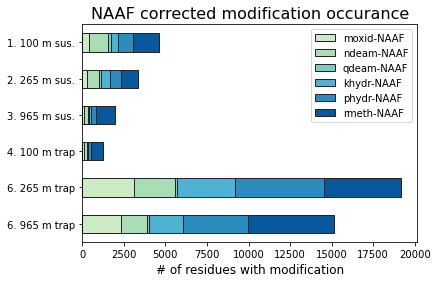

In [148]:
# plotting the NAAF-corrected PTMs
# order the horizontal bars by sample

#plt.subplots(nrows=2, ncols=2)
#plt.subplots(figsize=(20,10)) 
#plt.tight_layout()

PTM_AbsNAAF_sorted_desc= PTM_AbsNAAF.sort_values('data source',ascending=False)


my_colors1 = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
my_colors2 = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
my_colors3 = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
my_colors4 = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# another color option: 
#purples = '#bfd3e6', '#9ebcda', '#8c96c6', '#8c6bb1', '#88419d', '#6e016b'


# uncharged polar

ax1 = PTM_AbsNAAF_sorted_desc.plot.barh(y=['moxid-NAAF', 'ndeam-NAAF', \
                                           'qdeam-NAAF', 'khydr-NAAF', \
                                           'phydr-NAAF', 'rmeth-NAAF'
                            ], x='data source', stacked=True, color = my_colors3, edgecolor = '#252525')

ax1.legend()
ax1.set_xlabel('# of residues with modification', fontsize = 12)
ax1.set_ylabel('')
ax1.set_title('NAAF corrected modification occurance', fontsize = 16)

plt.savefig("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/absolute-skq17-ptms", transparent=True)